Prompt Depth Anything
====

**Prompting Depth Anything for 4K Resolution Accurate Metric Depth Estimation**

 * Paper: https://arxiv.org/abs/2412.14015

![Prompt Depth Anything](../assets/promptdepthanything_overview.png)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
from transformers import (
    AutoImageProcessor,
    AutoModelForDepthEstimation
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image_processor = AutoImageProcessor.from_pretrained(
    "depth-anything/prompt-depth-anything-vits-hf"
)
model = AutoModelForDepthEstimation.from_pretrained(
    "depth-anything/prompt-depth-anything-vits-hf"
).eval().to(device)


/home/pyml/anaconda3/envs/py311/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


 * **Note:** Model works on a low-cost LiDAR as prompt to guide depth-anything for more accurate metric depth estimation.
 * Here, we simply use a synthetic depth to show how the model works.

torch.Size([1137, 1068])


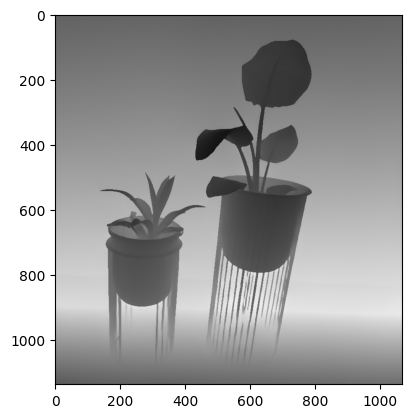

In [8]:
image_path = "../samples/plants.jpg"
image = Image.open(image_path).convert("RGB")

prompt_depth_path = "synthetic_depth.png"
prompt_depth = Image.open(prompt_depth_path).convert("L")

# prepare image for the model
inputs = image_processor(
    images=image, return_tensors="pt",
    prompt_depth=prompt_depth
).to(device)

with torch.no_grad():
    outputs = model(**inputs)

# interpolate to original size
post_processed_output = image_processor.post_process_depth_estimation(
    outputs,
    target_sizes=[(image.height, image.width)],
)

# visualize the prediction
predicted_depth = post_processed_output[0]["predicted_depth"]
print(predicted_depth.shape)

predicted_depth = predicted_depth.cpu().numpy()
# nomralize to [0, 1]
d_min, d_max = np.min(predicted_depth), np.max(predicted_depth)
predicted_depth = (predicted_depth - d_min) / (d_max - d_min)

plt.imshow(predicted_depth, cmap="gray")